<a href="https://colab.research.google.com/github/Mohamedh0/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the MNIST dataset
# Dataset is split into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes for verification
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Count and display the number of unique labels in the test set
unique, counts = np.unique(y_test, return_counts=True)
print('\nTest labels: ', dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


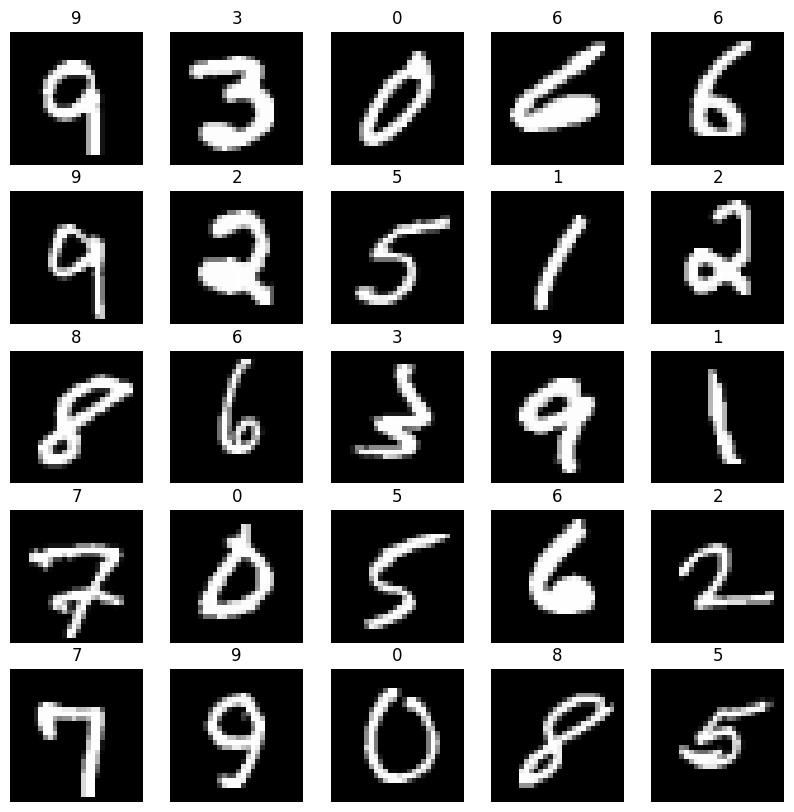

In [4]:
# Visualize 25 random samples from the training set
indices = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indices]
labels = y_train[indices]
plt.figure(figsize=(10, 10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [5]:
# convert to one-hot vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
# resize and normalize
input_size = x_train.shape[1] * x_train.shape[2]
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float') / 255
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [7]:
# Define model
model = Sequential([
    Dense(128, input_dim=input_size, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

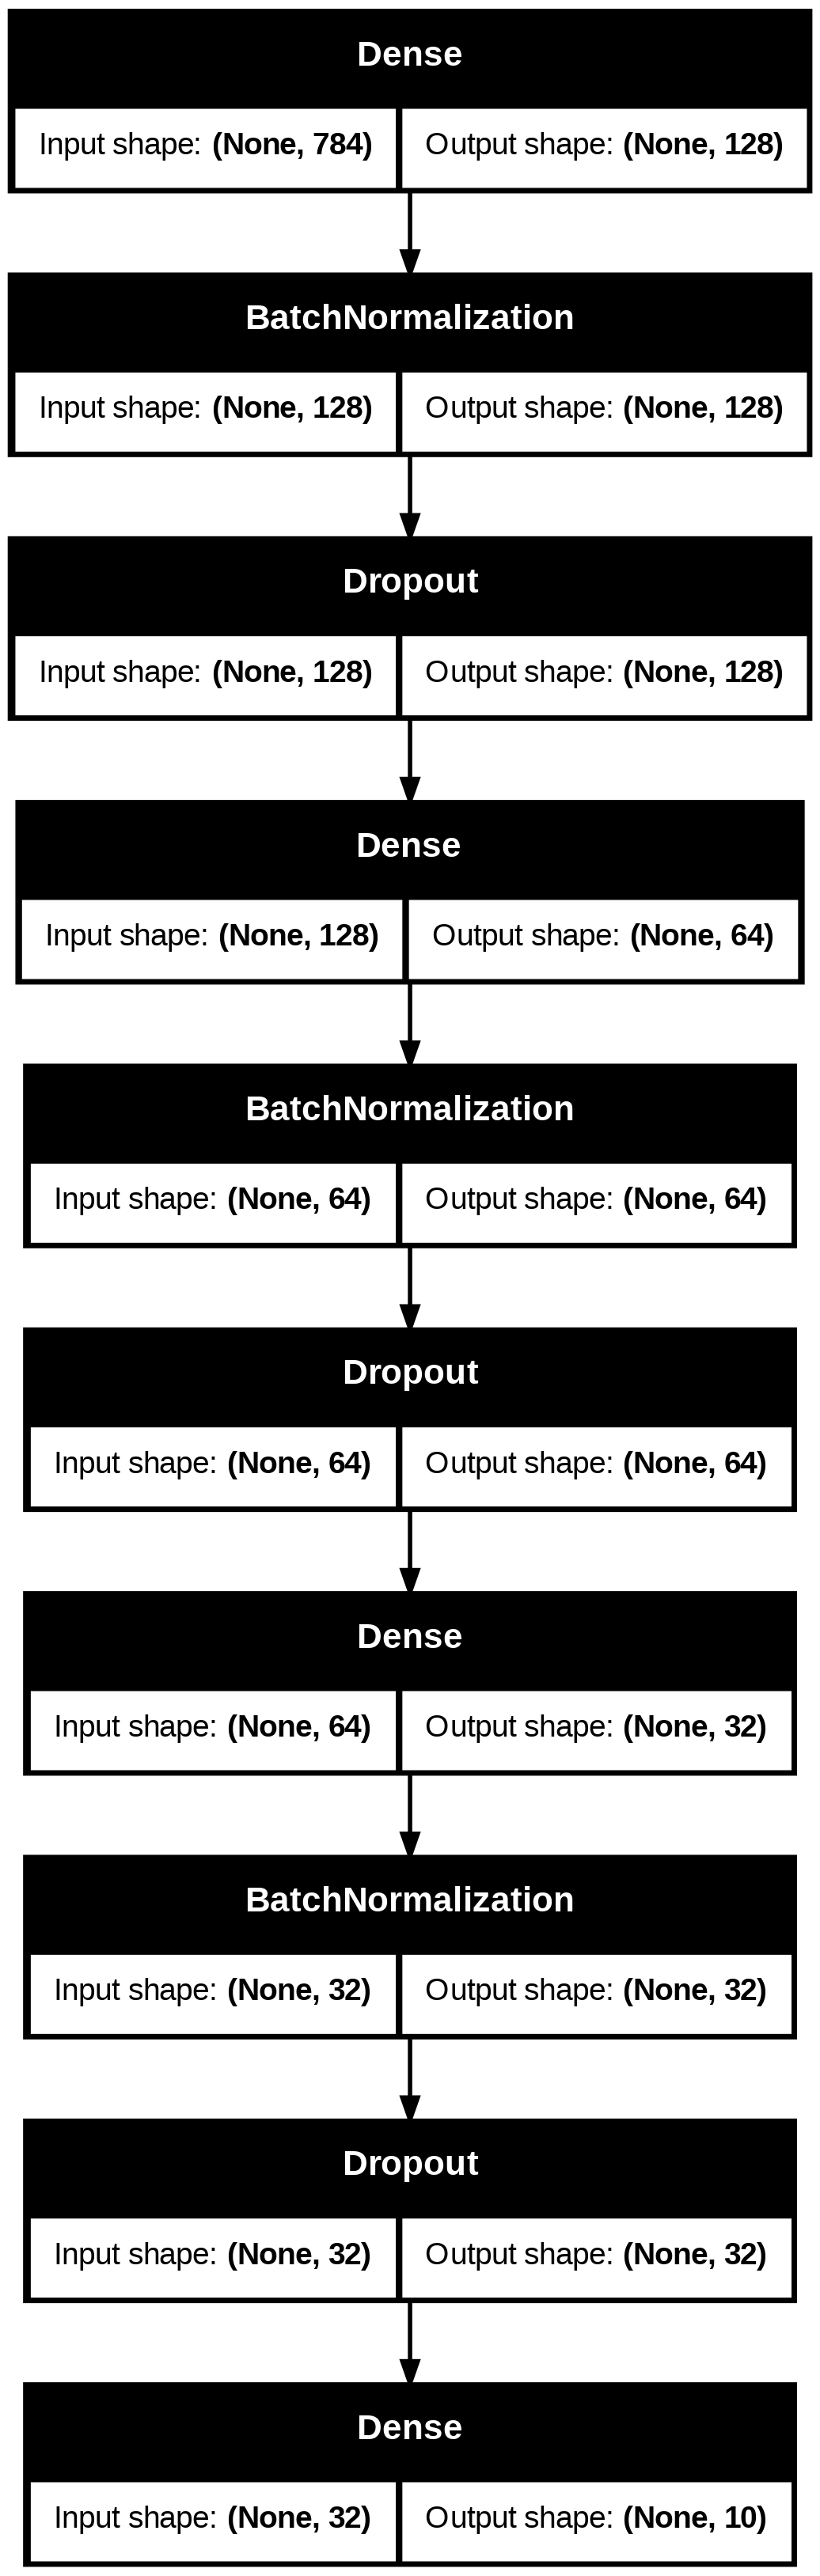

In [8]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7116 - loss: 1.2108 - val_accuracy: 0.9467 - val_loss: 0.3810
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9148 - loss: 0.4977 - val_accuracy: 0.9600 - val_loss: 0.3013
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9342 - loss: 0.3930 - val_accuracy: 0.9629 - val_loss: 0.2627
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9361 - loss: 0.3620 - val_accuracy: 0.9610 - val_loss: 0.2585
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9425 - loss: 0.3301 - val_accuracy: 0.9677 - val_loss: 0.2273
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9465 - loss: 0.3082 - val_accuracy: 0.9686 - val_loss: 0.2184
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9468 - loss: 0.3019 - val_accuracy: 0.9658 - val_loss: 0.2226
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9488 - loss: 0.2895 - val_accuracy: 0

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.2055
Test Loss: 0.1901, Test Accuracy: 0.9730


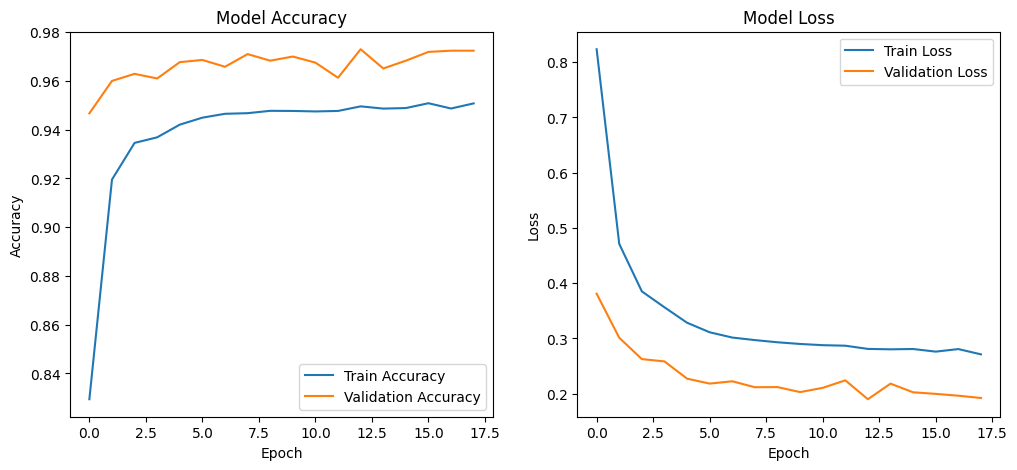

In [13]:
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


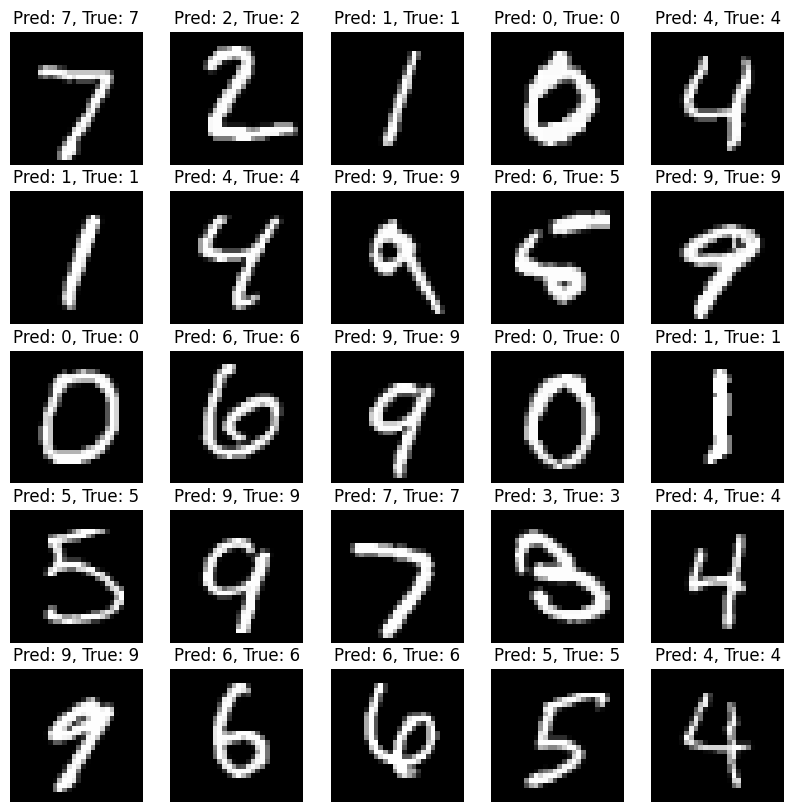

In [14]:
# Make predictions
predictions = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

# Visualize predictions for a few samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}, True: {true_labels[i]}")
    plt.axis('off')
plt.show()

In [15]:
model.save("mnist_model.h5")
print("Model saved as 'mnist_model.h5'.")

Model saved as 'mnist_model.h5'.
